In [1]:
%cd /Users/wg/Proj/tickettoride
from ticket_to_ride import *

%matplotlib inline
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

/Users/wg/Proj/tickettoride


In [2]:
import time

In [3]:

game1 = TicketToRide()
player1 = Player(DefaultStrategy)
player2 = Player(DefaultStrategy)
player1.sit(game1)
player2.sit(game1)
game1.simulate()


made name,  7574e3
made name,  4413f1


In [5]:
t = player1.tickets[1]
print t
player1.routes


        Ticket (not satisfied)
        from: Chicago
        to:   New Orleans
        points: 7
        


[Seattle => Portland, 1 (-),
 Dallas => Houston, 1 (-),
 Los Angeles => Las Vegas, 2 (-),
 Denver => Oklahoma City, 2 (-),
 Santa Fe => Oklahoma City, 2 (-),
 Duluth => Omaha, 2 (-),
 Oklahoma City => Dallas, 2 (-),
 Kansas City => Saint Louis, 2 (p),
 Houston => New Orleans, 2 (-),
 Saint Louis => Nashville, 2 (-),
 Toronto => Pittsburgh, 2 (-),
 Pittsburgh => Washington, 2 (-),
 Chicago => Saint Louis, 2 (w),
 Pittsburgh => New York, 2 (g),
 Montreal => New York, 2 (-),
 Washington => Raleigh, 2 (-),
 New York => Washington, 2 (k),
 San Francisco => Los Angeles, 3 (y),
 Salt Lake City => Las Vegas, 3 (o),
 Phoenix => Santa Fe, 3 (-)]

In [53]:
# Going first does seem to help your chances
np.mean(map(lambda g: g.winner == g.players[1], games))

0.19

In [54]:
class Analysis:
    def __init__(self, game):
        self.game = game
    
    def to_row(self):
        return dict(
            winner_position = game.players.index(game.winner),
            winner_points = game.winner.score(),
            winner_ticket_points = game.winner.ticket_points(),
            loser1_points = game.losers[0].score(),
            loser1_ticket_points = game.losers[0].ticket_points(),
            loser2_points = game.losers[1].score(),
            loser2_ticket_points = game.losers[1].ticket_points()
        )

In [55]:
Analysis(game).to_row()

{'loser1_points': 28,
 'loser1_ticket_points': -16,
 'loser2_points': 20,
 'loser2_ticket_points': -26,
 'winner_points': 30,
 'winner_position': 2,
 'winner_ticket_points': -20}

In [56]:
df = pd.DataFrame([Analysis(game).to_row() for game in games])

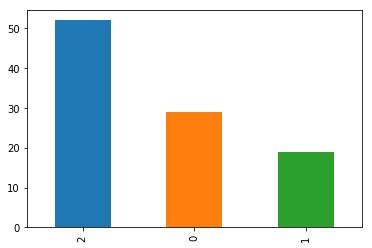

In [57]:
df.winner_position.value_counts().plot(kind='bar')

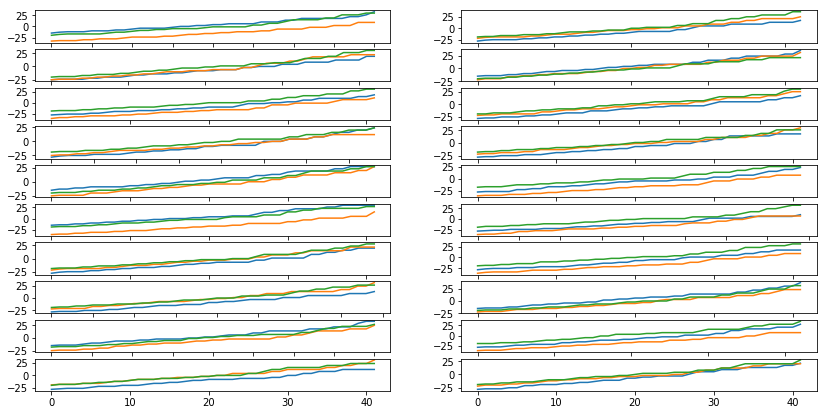

In [35]:
plt.figure(figsize=(14,7))
for i in range(len(games)):
    ax = plt.subplot(len(games)//2, 2, i+1)
    ax.plot(games[i].score_history)

In [3]:
from ticket_to_ride.data import *
from ticket_to_ride.helpers import *

class EdgeDistances(object):
    routes = routes
    cities = cities
    n = len(cities)
    weights = [[float("inf") for _ in range(n)] for _ in range(n)]

    for route in routes:
        if route.occupied():
            continue
        row_ix = cities.index(route.from_city)
        col_ix = cities.index(route.to_city)
        weights[row_ix][col_ix] = route.length
        weights[col_ix][row_ix] = route.length

In [5]:
pd.DataFrame(EdgeDistances.weights, columns=cities, index=cities)

,Atlanta,Boston,Calgary,Charleston,Chicago,Dallas,Denver,Duluth,El Paso,Helena,...,Saint Louis,Salt Lake City,San Francisco,Santa Fe,Sault St. Marie,Seattle,Toronto,Vancouver,Washington,Winnepeg
Atlanta,inf,inf,inf,2.000000,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
Boston,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
Calgary,inf,inf,inf,inf,inf,inf,inf,inf,inf,4.000000,...,inf,inf,inf,inf,inf,4.000000,inf,3.000000,inf,6.000000
Charleston,2.000000,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
Chicago,inf,inf,inf,inf,inf,inf,inf,3.000000,inf,inf,...,2.000000,inf,inf,inf,inf,inf,4.000000,inf,inf,inf
Dallas,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
Denver,inf,inf,inf,inf,inf,inf,inf,inf,inf,4.000000,...,inf,3.000000,inf,inf,inf,inf,inf,inf,inf,inf
Duluth,inf,inf,inf,inf,3.000000,inf,inf,inf,inf,6.000000,...,inf,inf,inf,inf,3.000000,inf,6.000000,inf,inf,4.000000
El Paso,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,2.000000,inf,inf,inf,inf,inf,inf
Helena,inf,inf,4.000000,inf,inf,inf,4.000000,6.000000,inf,inf,...,inf,3.000000,inf,inf,inf,6.000000,inf,inf,inf,4.000000
